In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# dimensions of our images.
img_width, img_height = 224, 224

train_data_dir = "/content/drive/MyDrive/Main Project/dataset/Train"
validation_data_dir = "/content/drive/MyDrive/Main Project/dataset/Validation"

epochs = 50
batch_size = 32

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
# view the structure of the model
model.summary()
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        1

In [ ]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')


Found 814 images belonging to 2 classes.
Found 136 images belonging to 2 classes.


In [ ]:
r=model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator) ,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))

model.save_weights('first_try.h5')
import tensorflow as tf

from keras.models import load_model

model.save('cropped_model.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
26/26 [==============================] - 507s 18s/step - loss: 0.6489 - accuracy: 0.6377 - val_loss: 0.3313 - val_accuracy: 0.9044
Epoch 2/50
26/26 [==============================] - 9s 354ms/step - loss: 0.3790 - accuracy: 0.8225 - val_loss: 0.2076 - val_accuracy: 0.9412
Epoch 3/50
26/26 [==============================] - 9s 348ms/step - loss: 0.4167 - accuracy: 0.8045 - val_loss: 0.2502 - val_accuracy: 0.9412
Epoch 4/50
26/26 [==============================] - 9s 352ms/step - loss: 0.2738 - accuracy: 0.9033 - val_loss: 0.1540 - val_accuracy: 0.9412
Epoch 5/50
26/26 [==============================] - 9s 347ms/step - loss: 0.2077 - accuracy: 0.9272 - val_loss: 0.1916 - val_accuracy: 0.9338
Epoch 6/50
26/26 [==============================] - 9s 353ms/step - loss: 0.2067 - accuracy: 0.9247 - val_loss: 0.2321 - val_accuracy: 0.9265
Epoch 7/50
26/26 [==============================] - 9s 353ms/step - loss: 0.2175 - accuracy: 0.9309 - val_loss: 0.1284 - val_accuracy: 0.9632
Epoch 

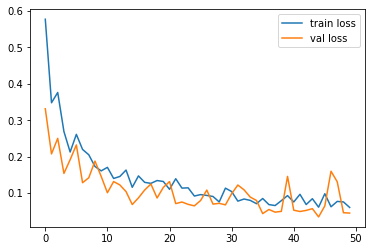

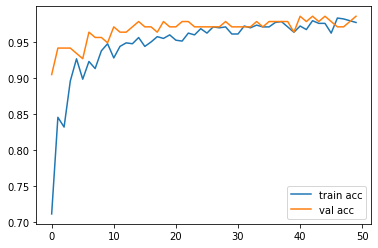

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

Yawning


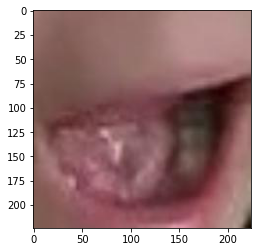

In [ ]:
from keras.preprocessing import image

test_image = image.load_img("/content/drive/MyDrive/Main Project/dataset/Train/yawn/yawn320.jpg", target_size = (224, 224)) 
imz=test_image
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

#predict the result
result = model.predict(test_image)
if result[0][0]==1:
    Detection="Yawning"
else:
    Detction="Not Yawning"


plt.imshow(imz)
print(Detection)  